In [1]:
!pip install networkx matplotlib



[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Is the graph bipartite? True
Greedy Maximum Matching: {(3, 'c'), (1, 'a'), (2, 'b')}



[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


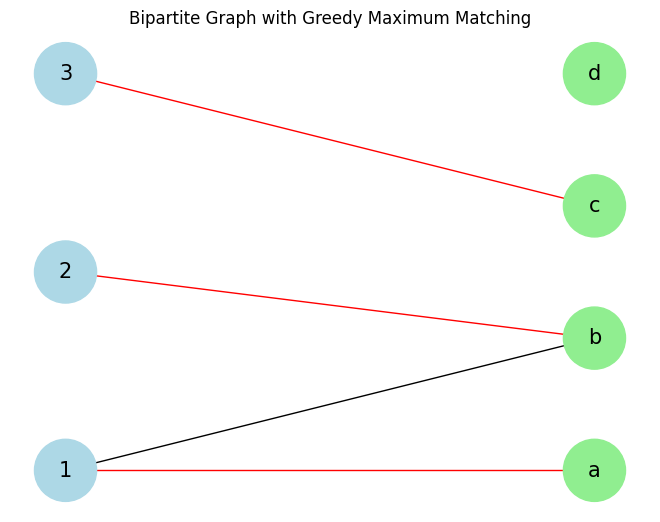

In [3]:
# Install necessary packages if not already installed
!pip install networkx matplotlib

# Import required libraries
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms import bipartite

# Create a bipartite graph
def create_bipartite_graph():
    B = nx.Graph()
    # Add nodes with the attribute "bipartite"
    top_nodes = {1, 2, 3}
    bottom_nodes = {'a', 'b', 'c','d'}
    B.add_nodes_from(top_nodes, bipartite=0)
    B.add_nodes_from(bottom_nodes, bipartite=1)

    # Add edges between nodes in the two sets
    edges = [(1, 'a'), (1, 'b'), (2, 'b'), (3, 'c')]
    B.add_edges_from(edges)

    return B, top_nodes, bottom_nodes

# Greedy algorithm for maximum matching
def greedy_maximum_matching(B, top_nodes, bottom_nodes):
    matching = set()  # To store the matching pairs
    matched_nodes = set()  # To keep track of matched nodes

    # Iterate over edges greedily
    for u, v in B.edges():
        if u not in matched_nodes and v not in matched_nodes:
            matching.add((u, v))
            matched_nodes.add(u)
            matched_nodes.add(v)

    return matching

# Step 1: Create a bipartite graph
B, top_nodes, bottom_nodes = create_bipartite_graph()

# Step 2: Check if the graph is bipartite
is_bipartite = bipartite.is_bipartite(B)
print(f"Is the graph bipartite? {is_bipartite}")

# Step 3: Perform greedy maximum matching if bipartite
if is_bipartite:
    # Apply the greedy maximum matching algorithm
    matching = greedy_maximum_matching(B, top_nodes, bottom_nodes)
    print(f"Greedy Maximum Matching: {matching}")

    # Step 4: Plot the graph with matching edges highlighted
    pos = nx.bipartite_layout(B, top_nodes)

    # Highlight matching edges in red
    matching_edges = list(matching)
    edge_colors = ['red' if (u, v) in matching_edges or (v, u) in matching_edges else 'black' for u, v in B.edges()]

    # Draw the graph with the highlighted matching
    nx.draw(B, pos, with_labels=True, edge_color=edge_colors,
            node_color=['lightblue' if n in top_nodes else 'lightgreen' for n in B.nodes()],
            node_size=2000, font_size=15)
    plt.title("Bipartite Graph with Greedy Maximum Matching")
    plt.show()
else:
    print("The graph is not bipartite.")
